## Exploratory Data Analysis (EDA) on the Movies Dataset


Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.

In this task, I'll be dealing with the movies dataset provided. I will do EDA on the dataset and 

In [131]:
# Importing the required packages here
import numpy as np
import pandas as pd

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import ast, json
from datetime import datetime

In [132]:
# Load the movie dataset and create their dataframes
movies_df = pd.read_csv("movies.csv")
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [133]:
# Droping the column which we areb not going to use
movies_df.drop(['keywords', 
                'homepage', 
                'status', 
                'tagline', 
                'original_language', 
                'overview', 
                'production_companies', 
                'original_title'], axis=1, inplace=True)

#### Remove any duplicate rows

In [134]:
# We remove duplicate rows if there's any
movies_df.drop_duplicates(keep="first")

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [135]:
# Dropping the zero budget and zero revenue information from the dataset
movies_df.drop(movies_df[movies_df["budget"] == 0].index, inplace=True)
movies_df.drop(movies_df[movies_df["revenue"] == 0].index, inplace=True)

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [136]:
# Change the release_date column to DateTime format
movies_df["release_date"] = pd.to_datetime(movies_df["release_date"], format= "%Y-%m-%d")

# Extract the release year from every release date
movies_df["release_year"] = pd.DatetimeIndex(movies_df["release_date"]).year
movies_df.release_year

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: release_year, Length: 3229, dtype: int64

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [137]:
# Convert budget and revenue format to an integer data type
movies_df["budget"] = movies_df["budget"].apply(np.int64)
movies_df["revenue"] = movies_df["revenue"].apply(np.int64)

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [138]:
# Define a function which takes a column name and a key as input arguments
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1 = []
        for j in range(len(i)):
            list1.append((i[j][key]))  # The key 'name' contains the name of the genre
        movies_df.loc[index,column] = str(list1)
        
# Calling the function to extract the data from specified columns 
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [139]:
# Sort the dataframe based on budget column in descending order
movies_df.sort_values("budget", ascending=False).head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


In [140]:
# Display the last five movies based on the budget
movies_df.tail()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994
4788,12000,"['Horror', 'Comedy', 'Crime']",692,4.553644,['United States of America'],1972-03-12,6000000,93.0,['English'],Pink Flamingos,6.2,110,1972
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],Cure,7.4,63,1997
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Primer,6.9,658,2004
4798,220000,"['Action', 'Crime', 'Thriller']",9367,14.269792,"['Mexico', 'United States of America']",1992-09-04,2040920,81.0,['Español'],El Mariachi,6.6,238,1992


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [141]:
# Calculate profit and store the value in new column profit
movies_df["profit"] = movies_df.revenue - movies_df.budget

# Sort the profit column in descending order and display the first five rows
movies_df.sort_values("profit", ascending=False).head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910


The top 5 most profitable movies are Avatar, Titanic, Jurassic World, Furious 7 and The Avengers. The maximum profit is approximately 2.55 Billion generated by the movie Avatar released in 2009, and the minimum profit is approximately 1.8 million generated by Spanish movie EL Mariachi released in 1992.

In [142]:
# Display the last five rows of the profict column which is in descending order
movies_df.tail()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994,3124130
4788,12000,"['Horror', 'Comedy', 'Crime']",692,4.553644,['United States of America'],1972-03-12,6000000,93.0,['English'],Pink Flamingos,6.2,110,1972,5988000
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],Cure,7.4,63,1997,79000
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Primer,6.9,658,2004,417760
4798,220000,"['Action', 'Crime', 'Thriller']",9367,14.269792,"['Mexico', 'United States of America']",1992-09-04,2040920,81.0,['Español'],El Mariachi,6.6,238,1992,1820920


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [143]:
# Sort the popularity column in descending order
movies_df.sort_values("popularity", ascending=False).head()

# Discuss the contributing factor for popularity

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


If we were to list the top five movies, the most popular or say the most talked about movies over the years are Minions, Interstellar, Deadpool, Guardians of The Galaxy, and Mad Max: Fury Road.

#### Find Movies which are rated above 7



In [144]:
# Sort the popularity column in descending order
rated_above_seven = movies_df[(movies_df.vote_average > 7)]
rated_above_seven

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,2009,683959197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,6706368,91.0,['English'],Roger & Me,7.4,90,1989,6546368
4724,10000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,7000000,89.0,['English'],Eraserhead,7.5,485,1977,6990000
4738,60000,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,3221152,84.0,['English'],Pi,7.1,586,1998,3161152
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994,3124130


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [145]:
# Apply ast.literal_eval function to the genres column
movies_df["genres"] = movies_df["genres"].apply(ast.literal_eval)

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

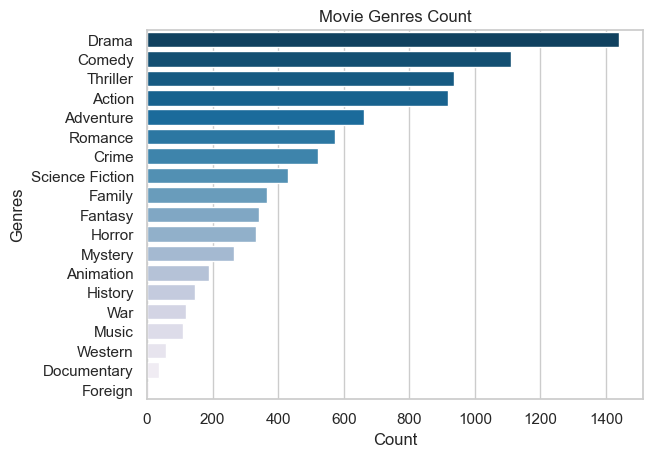

In [146]:
# Create a bar plot
ax = sns.countplot(data = movies_df, 
              y = movies_df.genres.explode(), 
              order = movies_df.genres.explode().value_counts().index, 
              palette = "PuBu_r")

# Set title and axis labels
ax.set_title("Movie Genres Count")
ax.set_xlabel("Count")
ax.set_ylabel("Genres")

# Save the file for report
# plt.savefig("moviesplt2.png", dpi=400, bbox_inches='tight')

# Display the plot and close
plt.show()
plt.close()

The above bar plot shows the frequency of movies in each genre. It comes with no surprise that Drama is the most successful genre followed by Comedy, Thriller, Action and many more. As per the graph above, more than 1400 movies are of Drama genres. There are more than thousand Comedy genre movies, and around 900 Thriller and Action genre movies releases. We can observe that the Thriller and the Action genres have almost the same number of movie releases. Documentry genre has the lowest movie releases.

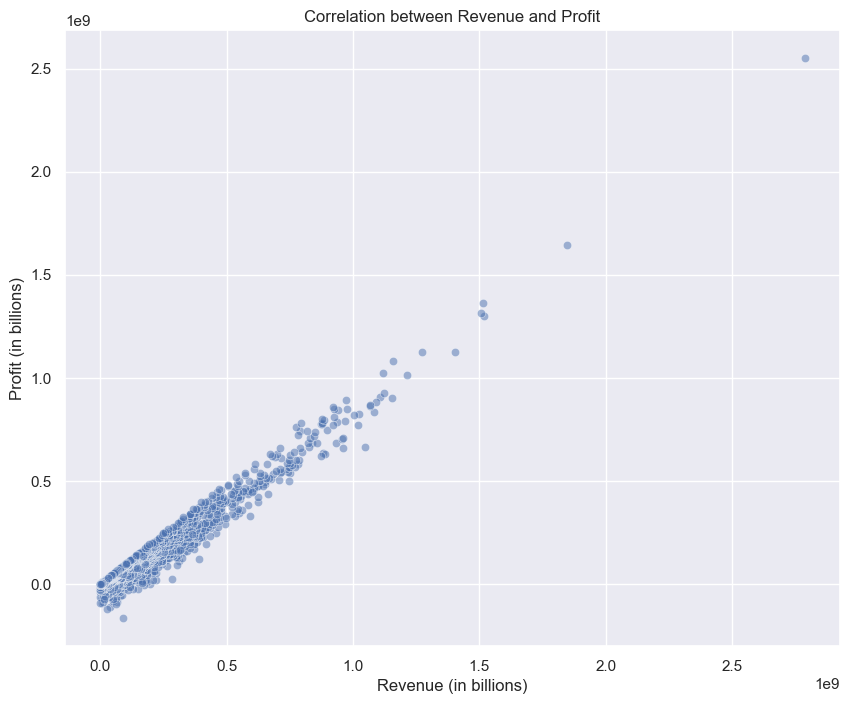

In [147]:
# Let's create scatterplot graph to showcase the correlation between revenue and the profit of the movies
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="revenue", y="profit", data=movies_df, color='b', alpha=0.5)

# set labels and title
plt.xlabel("Revenue (in billions)")
plt.ylabel("Profit (in billions)")
plt.title("Correlation between Revenue and Profit")


# Save the plot to use it on the report
# plt.savefig("revenue-profit.png", dpi=300)

# Display the plot and close
plt.show()

The above scatterplot shows the relationship between revenue and profit of the movies. The visualization shows that there's a positive correlation in between revenue and profit of the movies made, meaning if a movie has a higher revenue, the profit also tends to be higher. 

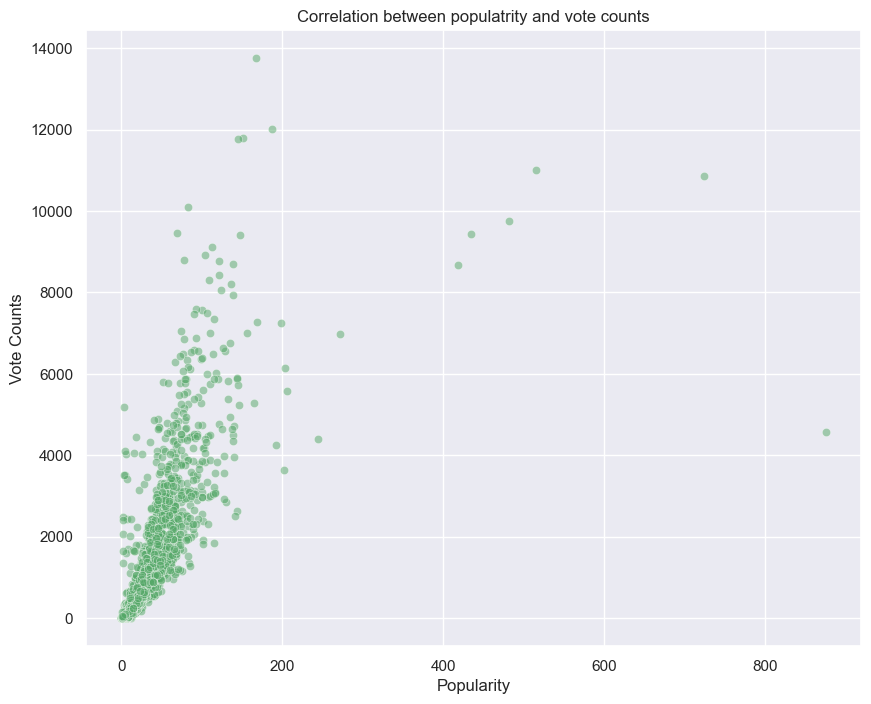

In [148]:
# Let's create scatterplot graph to showcase the correlation between revenue and the profit of the movies
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="popularity", y="vote_count", data=movies_df, color='g', alpha=0.5)

# set labels and title
plt.xlabel("Popularity")
plt.ylabel("Vote Counts")
plt.title("Correlation between populatrity and vote counts")


# Save the plot to use it on the report
# plt.savefig("popularity-votes.png", dpi=300)

# Display the plot and close
plt.show()
plt.close()

The above visualization looks very interesting. There are only a few movies which has the popularity score of more than 200. Majority of the movies have popularity score around below 100. Most of the movies in our dataset has vote counts in between 0 to 4,000 and very few movies has votes above 8,000. We can observe that in many instances, even if the movie has many votes, the movie seems to be less popular. But generally, if the movie is more popular they have more vote counts.

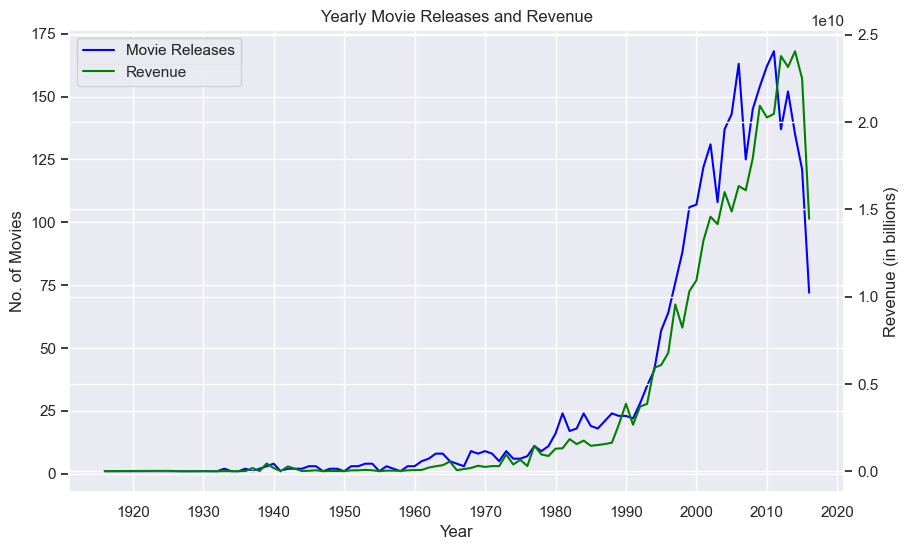

In [149]:
# Using groupby function to group the data by release year and count the number of each movies released using title column
yearly_movie_count = movies_df.groupby('release_year')['title'].count().reset_index(name='movie_count')

# Using groupby function to group the data by release year and calculate the total revenue for each year
yearly_revenue = movies_df.groupby('release_year')['revenue'].sum().reset_index(name='revenue')

# Merge the two dataframes so we can use that to create plots
yearly_df = pd.merge(yearly_movie_count, yearly_revenue, on='release_year')

# Create the line plot having two y-axes
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
sns.lineplot(data=yearly_df, x='release_year', y='movie_count', ax=ax1, color='blue', label='Movie Releases')
sns.lineplot(data=yearly_df, x='release_year', y='revenue', ax=ax2, color='green', label='Revenue')

# Set the title and axis labels
ax1.set_title('Yearly Movie Releases and Revenue')
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Movies')
ax2.set_ylabel('Revenue (in billions)')
plt.xticks(range(1920, 2021, 10))

# Set the legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Save the plot to use it on the report
# plt.savefig("revenue-releases.png", dpi=300)

# Display the plot and close it
plt.show()
plt.close()

I've created the dual axis line chart to visualize the number of movies released over the years and total yearly revenue generated. Above visulization shows us that there's positive correlation in between the number of movie releases and revenue generated from the movies, higher the number of movie releases, higher the revenue and vice-versa.There is a slight upward growth of both the number of movie releases and revenue until 1990, and they starts to grow significantly after that year. What makes this chart more interesting is, there's straight upward growth after 1990 till early 2010s and it seems like starting from early 2010s there's significant downward trend in the growth of movie releases and revenue. There may be several reasons behind this negative growth, one of many reasons could be because of the slowdowns in economic growth in many countries in the world including the European countries, overall a slower economic growth worldwide after 2008 financial crisis.